<a href="https://colab.research.google.com/github/nmatsuo63/my-dshc/blob/main/codexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ拡張
https://www.codexa.net/data_augmentation_python_keras/

## Augmentation内容一覧

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array


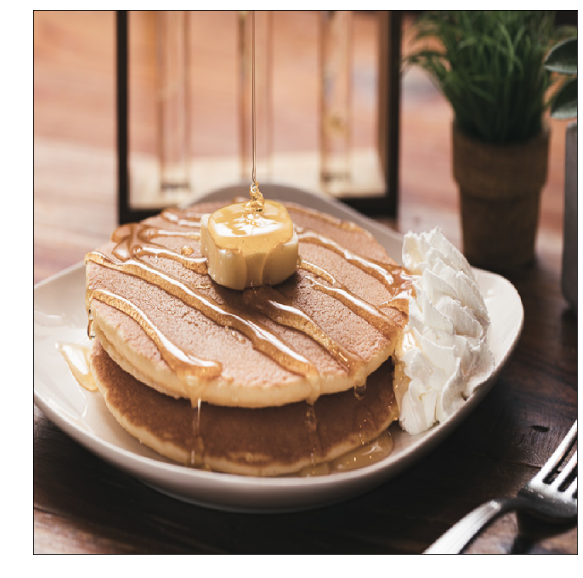

In [4]:
#アップロードされた画像を読み込み
img = image.load_img("/content/ogasuta458A8104_TP_V4.jpg", target_size=(640, 640))
#画像をnumpy配列に変換する
img = np.array(img)
#表示画像のサイズを設定
plt.figure(figsize = (10, 10))
#軸を表示しない
plt.xticks(color = "None")
plt.yticks(color = "None")
plt.tick_params(bottom = False, left = False)
#表示
plt.imshow(img)


In [5]:
ImageDataGenerator(
    featurewise_center = False,#○
    samplewise_center = False,#○
    featurewise_std_normalization = False,#○
    samplewise_std_normalization = False,#○
    zca_whitening = False,
    zca_epsilon = 1e-06,
    rotation_range = 0,#○
    width_shift_range = 0.0,#○
    height_shift_range = 0.0,#○
    brightness_range = None,#○
    shear_range = 0.0,#○
    zoom_range = 0.0,#○
    channel_shift_range = 0.0,#○
    fill_mode = "nearest",#○
    cval = 0.0,#○
    horizontal_flip = False,#○
    vertical_flip = False,#○
    rescale = None,#○
    preprocessing_function = None,#○
    data_format = None,
    validation_split = 0.0,
    dtype = None,
)

In [6]:
#画像表示用の関数を定義
def show(datagen, img):
  #表示サイズを設定
  plt.figure(figsize = (10, 5))
  
  #画像をbatch_sizeの数ずつdataに入れる
  #本稿は画像が一枚のため同じ画像がdataに入り続けることになる
  for i, data in enumerate(datagen.flow(img, batch_size = 1, seed = 0)):
    #表示のためnumpy配列からimgに変換する
    show_img = array_to_img(data[0], scale = False)
    #2×3の画像表示の枠を設定＋枠の指定
    plt.subplot(2, 3, i+1)
    #軸を表示しない
    plt.xticks(color = "None")
    plt.yticks(color = "None")
    plt.tick_params(bottom = False, left = False)
    #画像を表示
    plt.imshow(show_img)
    #6回目で繰り返しを強制的に終了
    if i == 5:
      return

In [7]:
#パンケーキの画像配列の形
print(img.shape)
#配列に次元を追加
img_cake=img[np.newaxis, :, :, :]
#次元追加後の配列の形
print(img_cake.shape)

(640, 640, 3)
(1, 640, 640, 3)


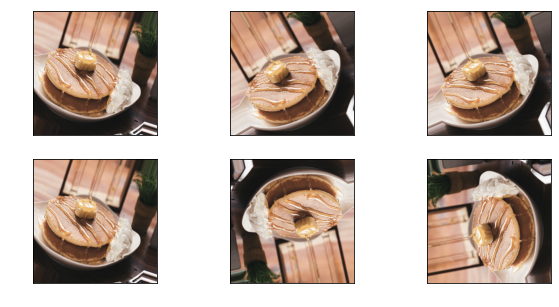

In [8]:
rotation_datagen = ImageDataGenerator(rotation_range = 180)
#画像を表示
show(rotation_datagen, img_cake)

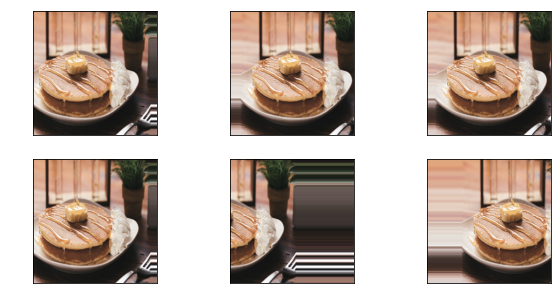

In [9]:
#-320〜+320の間でランダムに左右平行移動するImageDataGeneratorを作成
width_datagen = ImageDataGenerator(width_shift_range = 0.5)
show(width_datagen, img_cake)

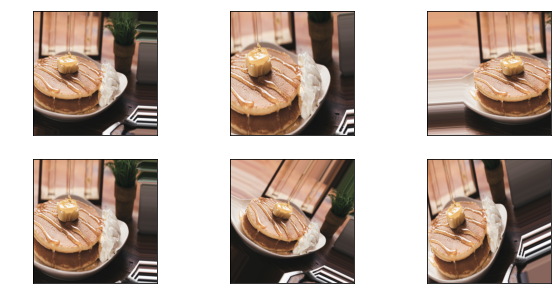

In [10]:
#複数の変換を適用するImageDataGeneratorクラスを作成
double_datagen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.3, zoom_range = 0.3)
show(double_datagen, img_cake)